In [35]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

housing_path = os.path.join("datasets")
csv_path = os.path.join(housing_path, "weather.csv")
# Load the dataset
data = pd.read_csv(csv_path)

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [36]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25000 non-null  int64  
 1   Date           25000 non-null  object 
 2   Location       25000 non-null  object 
 3   MinTemp        24669 non-null  float64
 4   MaxTemp        24824 non-null  float64
 5   Rainfall       24721 non-null  float64
 6   Evaporation    9432 non-null   float64
 7   Sunshine       6664 non-null   float64
 8   WindGustDir    21543 non-null  object 
 9   WindGustSpeed  21545 non-null  float64
 10  WindDir9am     21928 non-null  object 
 11  WindDir3pm     23267 non-null  object 
 12  WindSpeed9am   24428 non-null  float64
 13  WindSpeed3pm   23770 non-null  float64
 14  Humidity9am    24609 non-null  float64
 15  Humidity3pm    23936 non-null  float64
 16  Pressure9am    20172 non-null  float64
 17  Pressure3pm    20173 non-null  float64
 18  Cloud9

In [7]:
# Summary statistics
print(data.describe())

         Unnamed: 0       MinTemp       MaxTemp      Rainfall  Evaporation  \
count  25000.000000  24669.000000  24824.000000  24721.000000  9432.000000   
mean   12499.500000     13.294568     23.990558      2.674467     5.825138   
std     7217.022701      5.848304      6.114348      9.720306     4.871567   
min        0.000000     -3.300000      6.800000      0.000000     0.000000   
25%     6249.750000      8.900000     19.500000      0.000000     3.000000   
50%    12499.500000     14.000000     23.400000      0.000000     4.800000   
75%    18749.250000     17.900000     27.700000      0.600000     7.200000   
max    24999.000000     29.700000     47.300000    371.000000    86.200000   

          Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am  \
count  6664.000000   21545.000000  24428.000000  23770.000000  24609.000000   
mean      7.811945      37.772755     12.686917     16.837106     69.822951   
std       3.718698      13.212331      9.136115      9.09571

In [37]:
data.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [38]:
data.dtypes

Unnamed: 0         int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [39]:
# Drop unnecessary columns
data.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
data['Date']
# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
print('date change done ')

date change done 


In [43]:
# Convert categorical columns to numerical using label encoding
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

print("after categorical columns to numerical using label encoding ")
data['Location']    

after categorical columns to numerical using label encoding 


0        0
1        0
2        0
3        0
4        0
        ..
24995    8
24996    8
24997    8
24998    8
24999    8
Name: Location, Length: 25000, dtype: int64

In [44]:
# Split the dataset into features and target variable
X = data.drop('RainTomorrow', axis=1)  # Features
y = data['RainTomorrow']  # Target variable

In [45]:
# Normalize numeric features
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RISK_MM']
X[numeric_cols] = (X[numeric_cols] - X[numeric_cols].mean()) / X[numeric_cols].std()
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2008-12-01,0,0.018028,-0.178360,-0.213416,NaN,NaN,13,0.471321,13,...,0.066291,-1.450384,-1.615971,-1.333490,1.262619,NaN,-0.195208,-0.118762,0,-0.275859
1,2008-12-02,0,-1.007911,0.181449,-0.275142,NaN,NaN,14,0.471321,6,...,-1.454330,-1.308942,-1.168517,-1.224026,NaN,NaN,-0.139597,0.301086,0,-0.275859
2,2008-12-03,0,-0.067467,0.279579,-0.275142,NaN,NaN,15,0.622694,13,...,-1.792246,-1.073206,-1.631401,-1.083287,NaN,-0.886009,0.564800,0.116353,0,-0.275859
3,2008-12-04,0,-0.700129,0.655743,-0.275142,NaN,NaN,4,-1.042417,9,...,-1.398011,-1.733268,-0.088455,-0.442144,NaN,NaN,0.027233,0.670552,0,-0.172826
4,2008-12-05,0,0.719086,1.359007,-0.172265,NaN,NaN,13,0.244260,1,...,0.685803,-0.931764,-1.137658,-1.505504,0.925781,1.320494,-0.028377,1.207957,0,-0.255252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2013-03-09,8,0.548096,0.982843,-0.275142,NaN,NaN,4,-0.891043,10,...,0.967399,-0.554586,NaN,NaN,NaN,NaN,0.676020,1.157575,0,-0.275859
24996,2013-03-10,8,0.582294,1.064618,-0.275142,NaN,NaN,4,-1.042417,2,...,0.798441,-0.413144,NaN,NaN,NaN,NaN,0.620410,1.090400,0,-0.275859
24997,2013-03-11,8,0.855878,0.950133,-0.275142,NaN,NaN,1,-0.891043,16,...,1.586911,-0.177407,NaN,NaN,NaN,NaN,0.490652,0.956048,0,-0.275859
24998,2013-03-12,8,0.719086,0.672098,-0.275142,NaN,NaN,5,-1.193790,8,...,1.136357,0.058329,NaN,NaN,NaN,NaN,0.601873,0.720934,0,-0.275859


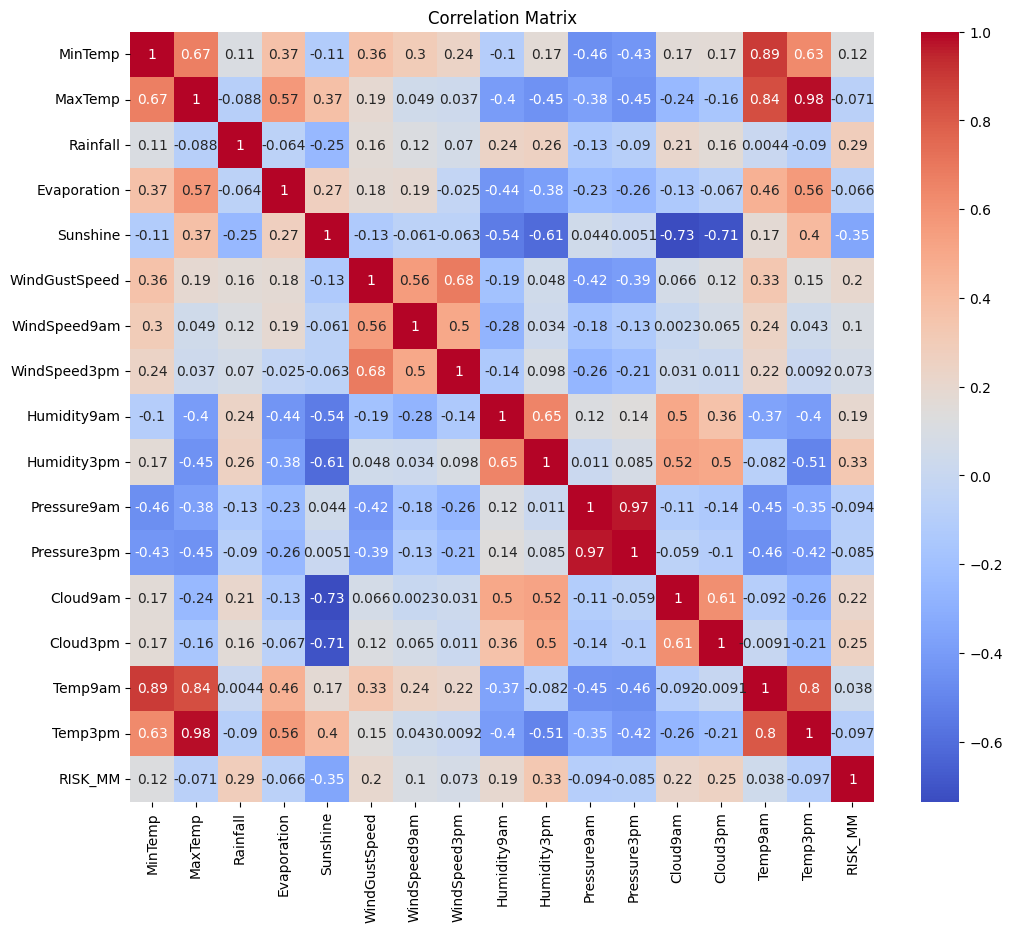

In [17]:
# Correlation matrix
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RISK_MM']

numeric_data = data[numeric_cols]
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

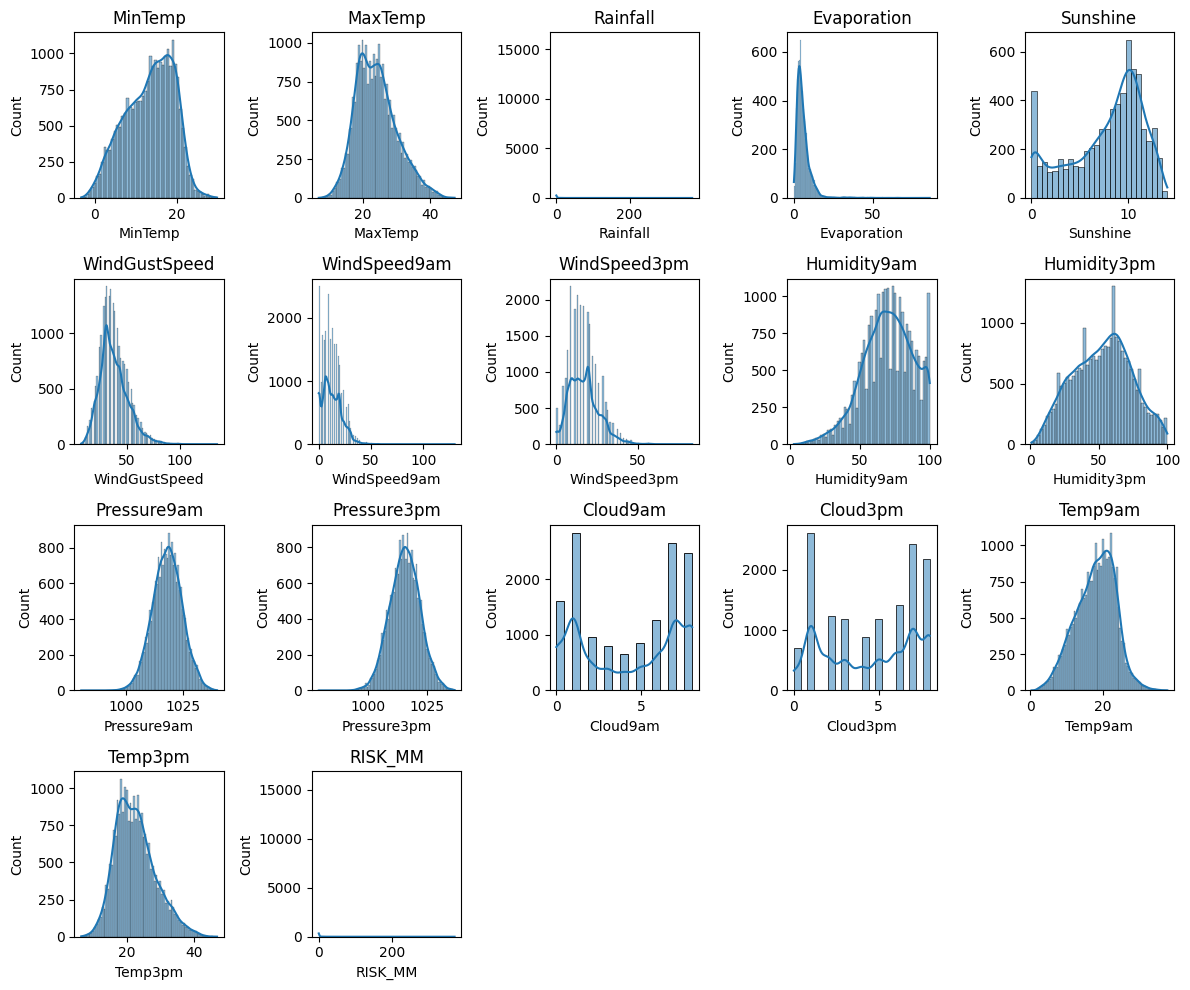

done


In [20]:
# Distribution of numeric features
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()
print('done')

In [46]:
# Create new features
# Extract year, month, and day from the 'Date' column
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Day'] = pd.to_datetime(data['Date']).dt.day

In [47]:
# Calculate the difference between max and min temperature
data['TempDiff'] = data['MaxTemp'] - data['MinTemp']

In [48]:
# Perform imputation for missing values
imputer = SimpleImputer(strategy='mean')
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RISK_MM']
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])


In [49]:
# Log transform skewed features
skewed_features = ['Rainfall', 'Evaporation']
data[skewed_features] = np.log1p(data[skewed_features])

# Drop unnecessary columns
data.drop([ 'Date'], axis=1, inplace=True)

# Encode categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the dataset into features and target variable
X = data.drop('RainTomorrow', axis=1)  # Features
y = data['RainTomorrow']  # Target variable

In [51]:
# Perform imputation for missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [52]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9998


In [54]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [55]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9998
Precision: 1.0
Recall: 0.9990999099909991
F1 Score: 0.9995497523638001
ROC AUC Score: 0.9995499549954996
Confusion Matrix:
[[3889    0]
 [   1 1110]]
